Capstone Project
=========

Airbnb New User Bookings
---------------------------

O objetivo desse notebook é prever qual o país de destino de um usuário baseado seus dados demográficos, registros de sessão da Web e algumas estatísticas de resumo. Todos os usuários desse conjunto de dados são dos EUA e podem ter 12 possíveis destinos 'EUA', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL', 'DE', 'AU', 'NDF' e 'outro', sendo 'NDF' nenhum destino encontrado.

In [31]:
#Importando bibliotecas necessárias

import sklearn
import numpy as np
import pandas as pd
import visuals as vs

import matplotlib.pyplot as plt



In [2]:
#Leitura dos arquivos 

data = pd.read_csv('train_users_2.csv')

age_gender_bkts = pd.read_csv('age_gender_bkts.csv')

sessions = pd.read_csv('sessions.csv')

In [19]:
#Limpeza e formatação dos dados

data['date_account_created'] = pd.to_datetime(data.date_account_created)
data['date_first_booking'] = pd.to_datetime(data.date_first_booking)
data.replace("-unknown-", np.nan, inplace=True)

#Retirando pessoas com idades que provavelmente foram erros
data.loc[data.age > 95, 'age'] = np.nan
data.loc[data.age < 13, 'age'] = np.nan

#Transformação do tipo para data
data['date_account_created'] = pd.to_datetime(data['date_account_created'])
data['date_first_booking'] = pd.to_datetime(data['date_first_booking'])
data['date_first_active'] = pd.to_datetime((data.timestamp_first_active // 1000000), format='%Y%m%d')



### Visualização dos dados

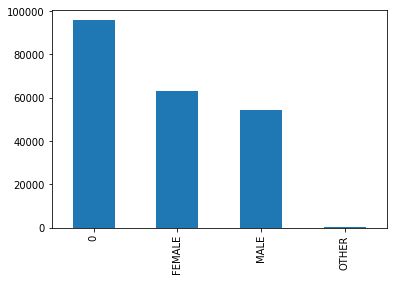

In [35]:
data.gender.value_counts(dropna=False).plot(kind='bar')

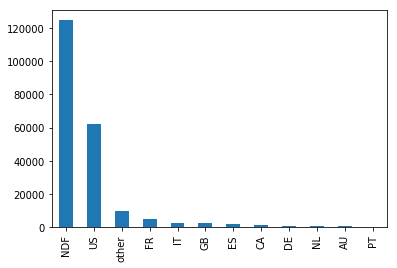

In [36]:
destination = data.country_destination.value_counts()
destination.plot(kind='bar')

In [ ]:
data.age.plot(kind='bar')

In [ ]:
data.date_account_created.value_counts().plot(kind='line')

In [ ]:
sessions.fillna(0, inplace=True)

### Análise Exploratória

In [4]:
print data.head(20)
data.describe()

            id date_account_created  timestamp_first_active  \
0   gxn3p5htnn           2010-06-28          20090319043255   
1   820tgsjxq7           2011-05-25          20090523174809   
2   4ft3gnwmtx           2010-09-28          20090609231247   
3   bjjt8pjhuk           2011-12-05          20091031060129   
4   87mebub9p4           2010-09-14          20091208061105   
5   osr2jwljor           2010-01-01          20100101215619   
6   lsw9q7uk0j           2010-01-02          20100102012558   
7   0d01nltbrs           2010-01-03          20100103191905   
8   a1vcnhxeij           2010-01-04          20100104004211   
9   6uh8zyj2gn           2010-01-04          20100104023758   
10  yuuqmid2rp           2010-01-04          20100104194251   
11  om1ss59ys8           2010-01-05          20100105051812   
12  k6np330cm1           2010-01-05          20100105060859   
13  dy3rgx56cu           2010-01-05          20100105083259   
14  ju3h98ch3w           2010-01-07          2010010705

,timestamp_first_active,age,signup_flow
count,2.134510e+05,213451.000000,213451.000000
mean,2.013085e+13,29.193768,3.267387
std,9.253717e+09,121.822356,7.637707
min,2.009032e+13,0.000000,0.000000
25%,2.012123e+13,0.000000,0.000000
50%,2.013091e+13,26.000000,0.000000
75%,2.014031e+13,36.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


In [5]:
print sessions.head()
sessions.describe()

      user_id          action action_type        action_detail  \
0  d1mm9tcy42          lookup           0                    0   
1  d1mm9tcy42  search_results       click  view_search_results   
2  d1mm9tcy42          lookup           0                    0   
3  d1mm9tcy42  search_results       click  view_search_results   
4  d1mm9tcy42          lookup           0                    0   

       device_type  secs_elapsed  
0  Windows Desktop         319.0  
1  Windows Desktop       67753.0  
2  Windows Desktop         301.0  
3  Windows Desktop       22141.0  
4  Windows Desktop         435.0  


,secs_elapsed
count,1.056774e+07
mean,1.915601e+04
std,8.833741e+04
min,0.000000e+00
25%,2.080000e+02
50%,1.108000e+03
75%,8.193000e+03
max,1.799977e+06


In [6]:
print age_gender_bkts.head()
age_gender_bkts.describe()

  age_bucket country_destination gender  population_in_thousands    year
0       100+                  AU   male                      1.0  2015.0
1      95-99                  AU   male                      9.0  2015.0
2      90-94                  AU   male                     47.0  2015.0
3      85-89                  AU   male                    118.0  2015.0
4      80-84                  AU   male                    199.0  2015.0


,population_in_thousands,year
count,420.000000,420.0
mean,1743.133333,2015.0
std,2509.843202,0.0
min,0.000000,2015.0
25%,396.500000,2015.0
50%,1090.500000,2015.0
75%,1968.000000,2015.0
max,11601.000000,2015.0


### Modelo

In [7]:
#Importando modelos multiclasses

from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 

In [12]:
y = data[['id', 'country_destination']]
X = data.drop(['country_destination', 'first_browser', 'first_device_type'], axis=1) 

In [16]:
print X.head(10)

           id date_account_created  timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28          20090319043255         1970-01-01   
1  820tgsjxq7           2011-05-25          20090523174809         1970-01-01   
2  4ft3gnwmtx           2010-09-28          20090609231247         2010-08-02   
3  bjjt8pjhuk           2011-12-05          20091031060129         2012-09-08   
4  87mebub9p4           2010-09-14          20091208061105         2010-02-18   
5  osr2jwljor           2010-01-01          20100101215619         2010-01-02   
6  lsw9q7uk0j           2010-01-02          20100102012558         2010-01-05   
7  0d01nltbrs           2010-01-03          20100103191905         2010-01-13   
8  a1vcnhxeij           2010-01-04          20100104004211         2010-07-29   
9  6uh8zyj2gn           2010-01-04          20100104023758         2010-01-04   

   gender   age signup_method  signup_flow language affiliate_channel  \
0       0   0.0      facebook      

In [10]:
print y.head()

           id country_destination
0  gxn3p5htnn                 NDF
1  820tgsjxq7                 NDF
2  4ft3gnwmtx                  US
3  bjjt8pjhuk               other
4  87mebub9p4                  US


In [15]:
clf = GaussianNB()
clf.fit(X, y)

ValueError: could not convert string to float: iOS